In [ ]:
import torch
from torchvision import models, transforms
import json

# Load the pre-trained VGG model (e.g., VGG16)
model = models.vgg16(pretrained=True)
model.eval()  # Set the model to evaluation mode

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

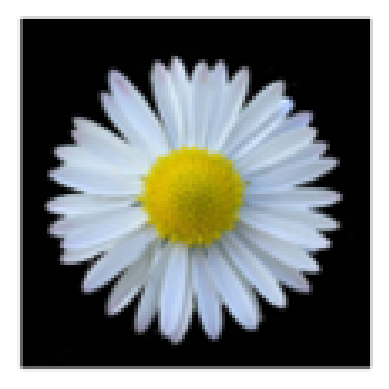

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = "Picture2.png"
input_image = Image.open(image_path)
# Display the image
plt.imshow(input_image)
plt.axis('off')  # Turn off the axis labels
plt.show()

In [ ]:
# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Ensure the image is in RGB format (discard the alpha channel if present)
if input_image.mode != 'RGB':
    input_image = input_image.convert('RGB')

input_tensor = preprocess(input_image)
print(input_tensor.shape)

input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model
print(input_tensor.shape)


torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [ ]:

# Make sure to use the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
input_batch = input_batch.to(device)

# Make the prediction
with torch.no_grad():
    output = model(input_batch)

# The output has unnormalized scores. To get probabilities, you can apply softmax
probabilities = torch.nn.functional.softmax(output[0], dim=0)

In [ ]:
import requests # import requests module

# Load the labels
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
response = requests.get(LABELS_URL) # Fetch the content from the URL
labels = json.loads(response.text) # Load the JSON data from the response

# Get the top 5 predicted labels
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(labels[top5_catid[i]], top5_prob[i].item())

daisy 0.9998020529747009
sulphur-crested cockatoo 6.254327308852226e-05
ant 4.7840585466474295e-05
bee 2.457446862536017e-05
vase 1.335691922577098e-05
